In [1]:
#Upload VLE dataset
import pandas as pd
import matplotlib.pyplot as plt
# Replace 'your_file.csv' with the path to your CSV file
file_path = 'OUData/studentVle.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df.head())

  code_module code_presentation  id_student  id_site  date  sum_click
0         AAA             2013J       28400   546652   -10          4
1         AAA             2013J       28400   546652   -10          1
2         AAA             2013J       28400   546652   -10          1
3         AAA             2013J       28400   546614   -10         11
4         AAA             2013J       28400   546714   -10          1


In [2]:
#Let's aggregate the sum_click to get total daily clicks and also ignore different types of sites
# List of columns to group by. This should include all columns except 'sum_click' and 'id_site'
columns_to_group_by = ['code_module', 'code_presentation', 'id_student','date'] 

# Group by the specified columns and sum the 'sum_click' for each group
df_grouped = df.groupby(columns_to_group_by).agg(total_daily_clicks=('sum_click', 'sum')).reset_index()
df_grouped.head(100)

,code_module,code_presentation,id_student,date,total_daily_clicks
0,AAA,2013J,11391,-5,98
1,AAA,2013J,11391,0,49
2,AAA,2013J,11391,1,127
3,AAA,2013J,11391,2,4
4,AAA,2013J,11391,6,3
...,...,...,...,...,...
95,AAA,2013J,28400,150,3
96,AAA,2013J,28400,154,27
97,AAA,2013J,28400,155,1
98,AAA,2013J,28400,156,25


In [3]:
import numpy as np
#create function that returns df with all dates included and 0 for total_daily_clicks for missing dates
def complete_df(id_student):
    #filter by course, presentation, and student
    filtered_df = df_grouped[df_grouped['id_student']==id_student]

    #For missing dates, we will make total_daily_clicks to be 0
  
    # Step 1: Find min and max date values
    min_day = filtered_df['date'].min()
    max_day = filtered_df['date'].max()

    # Step 2: Generate complete range of days
    all_days = np.arange(min_day, max_day + 1)  # +1 to include the last day

    # Step 3: Create a DataFrame with all days
    df_all_days = pd.DataFrame({'date': all_days, 'id_student': id_student})
    df_all_days = df_all_days.assign(total_daily_clicks=0)

    # Merge to update total_daily_clicks where data exists
    df_complete = pd.merge(df_all_days, filtered_df[['date', 'total_daily_clicks']], on='date', how='left', suffixes=('', '_update'))
    df_complete['total_daily_clicks'] = df_complete['total_daily_clicks_update'].fillna(df_complete['total_daily_clicks'])
    df_complete.drop(columns='total_daily_clicks_update', inplace=True)

    return df_complete

In [4]:
#Load StudentInfo dataset that has the outcomes of each student for a given module and presentation
file_path = 'OUData/studentInfo.csv'
df_student_info = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df_student_info.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [5]:
#define dataframes for all withdrawn students, all fail students, all pass students, all distinction students
df_withdrawn = df_student_info[df_student_info['final_result']=='Withdrawn']
df_fail = df_student_info[df_student_info['final_result']=='Fail']
df_pass = df_student_info[df_student_info['final_result']=='Pass']
df_distinction = df_student_info[df_student_info['final_result']=='Distinction']

In [6]:
#get aggregated df for all withdrawn students

# Unique list of student IDs
unique_student_ids = df_withdrawn['id_student'].unique()
# Initialize an empty DataFrame for combining data
combined_df = pd.DataFrame()

# Loop through each student ID
for student_id in unique_student_ids:
    # Check if the DataFrame is empty
    df=df_grouped
    if df[df['id_student']==student_id].empty:
        print(f"Skipping student ID {student_id} due to no data.")
        continue  # Skip the rest of the loop for this student ID
    # Assuming complete_df returns a DataFrame for the given student ID
    df_student = complete_df(student_id)
    
    # Combine the current student's data with the aggregated DataFrame
    combined_df = pd.concat([combined_df, df_student], ignore_index=True)

# Group by 'date' and calculate mean 'total_daily_clicks'
aggregated_df_withdrawn = combined_df.groupby('date')['total_daily_clicks'].mean().reset_index()

Skipping student ID 292923 due to no data.
Skipping student ID 405961 due to no data.
Skipping student ID 2324976 due to no data.
Skipping student ID 2365101 due to no data.
Skipping student ID 323805 due to no data.
Skipping student ID 328734 due to no data.
Skipping student ID 488382 due to no data.
Skipping student ID 567922 due to no data.
Skipping student ID 623710 due to no data.
Skipping student ID 1469279 due to no data.
Skipping student ID 34694 due to no data.
Skipping student ID 72070 due to no data.
Skipping student ID 87604 due to no data.
Skipping student ID 88580 due to no data.
Skipping student ID 123379 due to no data.
Skipping student ID 127209 due to no data.
Skipping student ID 143854 due to no data.
Skipping student ID 174321 due to no data.
Skipping student ID 185240 due to no data.
Skipping student ID 228235 due to no data.
Skipping student ID 230348 due to no data.
Skipping student ID 232600 due to no data.
Skipping student ID 232745 due to no data.
Skipping stu

Skipping student ID 184236 due to no data.
Skipping student ID 184897 due to no data.
Skipping student ID 185597 due to no data.
Skipping student ID 228243 due to no data.
Skipping student ID 228513 due to no data.
Skipping student ID 238825 due to no data.
Skipping student ID 243047 due to no data.
Skipping student ID 244917 due to no data.
Skipping student ID 264842 due to no data.
Skipping student ID 274577 due to no data.
Skipping student ID 278773 due to no data.
Skipping student ID 280439 due to no data.
Skipping student ID 304795 due to no data.
Skipping student ID 305547 due to no data.
Skipping student ID 312531 due to no data.
Skipping student ID 338878 due to no data.
Skipping student ID 339656 due to no data.
Skipping student ID 340661 due to no data.
Skipping student ID 341612 due to no data.
Skipping student ID 342678 due to no data.
Skipping student ID 355591 due to no data.
Skipping student ID 355692 due to no data.
Skipping student ID 358289 due to no data.
Skipping st

Skipping student ID 594057 due to no data.
Skipping student ID 594253 due to no data.
Skipping student ID 595287 due to no data.
Skipping student ID 595388 due to no data.
Skipping student ID 595420 due to no data.
Skipping student ID 596095 due to no data.
Skipping student ID 596103 due to no data.
Skipping student ID 596241 due to no data.
Skipping student ID 597109 due to no data.
Skipping student ID 598199 due to no data.
Skipping student ID 598394 due to no data.
Skipping student ID 598596 due to no data.
Skipping student ID 598901 due to no data.
Skipping student ID 599456 due to no data.
Skipping student ID 599475 due to no data.
Skipping student ID 599606 due to no data.
Skipping student ID 600006 due to no data.
Skipping student ID 600681 due to no data.
Skipping student ID 600844 due to no data.
Skipping student ID 601424 due to no data.
Skipping student ID 601491 due to no data.
Skipping student ID 602863 due to no data.
Skipping student ID 602971 due to no data.
Skipping st

Skipping student ID 616361 due to no data.
Skipping student ID 616428 due to no data.
Skipping student ID 616809 due to no data.
Skipping student ID 616816 due to no data.
Skipping student ID 616848 due to no data.
Skipping student ID 617140 due to no data.
Skipping student ID 617905 due to no data.
Skipping student ID 618054 due to no data.
Skipping student ID 618108 due to no data.
Skipping student ID 618292 due to no data.
Skipping student ID 618360 due to no data.
Skipping student ID 618362 due to no data.
Skipping student ID 618710 due to no data.
Skipping student ID 618858 due to no data.
Skipping student ID 618870 due to no data.
Skipping student ID 618957 due to no data.
Skipping student ID 619265 due to no data.
Skipping student ID 619901 due to no data.
Skipping student ID 620047 due to no data.
Skipping student ID 620175 due to no data.
Skipping student ID 620230 due to no data.
Skipping student ID 620289 due to no data.
Skipping student ID 620546 due to no data.
Skipping st

Skipping student ID 592090 due to no data.
Skipping student ID 595018 due to no data.
Skipping student ID 595850 due to no data.
Skipping student ID 596744 due to no data.
Skipping student ID 598317 due to no data.
Skipping student ID 599232 due to no data.
Skipping student ID 601285 due to no data.
Skipping student ID 601882 due to no data.
Skipping student ID 603203 due to no data.
Skipping student ID 608319 due to no data.
Skipping student ID 610437 due to no data.
Skipping student ID 614405 due to no data.
Skipping student ID 615016 due to no data.
Skipping student ID 617671 due to no data.
Skipping student ID 617804 due to no data.
Skipping student ID 620135 due to no data.
Skipping student ID 621935 due to no data.
Skipping student ID 622722 due to no data.
Skipping student ID 626835 due to no data.
Skipping student ID 628435 due to no data.
Skipping student ID 628819 due to no data.
Skipping student ID 630465 due to no data.
Skipping student ID 632144 due to no data.
Skipping st

Skipping student ID 688522 due to no data.
Skipping student ID 688927 due to no data.
Skipping student ID 689112 due to no data.
Skipping student ID 689180 due to no data.
Skipping student ID 689350 due to no data.
Skipping student ID 689478 due to no data.
Skipping student ID 689628 due to no data.
Skipping student ID 689952 due to no data.
Skipping student ID 690102 due to no data.
Skipping student ID 690329 due to no data.
Skipping student ID 690825 due to no data.
Skipping student ID 691367 due to no data.
Skipping student ID 691509 due to no data.
Skipping student ID 691815 due to no data.
Skipping student ID 692392 due to no data.
Skipping student ID 692528 due to no data.
Skipping student ID 692532 due to no data.
Skipping student ID 692537 due to no data.
Skipping student ID 692540 due to no data.
Skipping student ID 692542 due to no data.
Skipping student ID 692625 due to no data.
Skipping student ID 692855 due to no data.
Skipping student ID 692871 due to no data.
Skipping st

Skipping student ID 442823 due to no data.
Skipping student ID 465281 due to no data.
Skipping student ID 466430 due to no data.
Skipping student ID 477246 due to no data.
Skipping student ID 477488 due to no data.
Skipping student ID 485949 due to no data.
Skipping student ID 488192 due to no data.
Skipping student ID 490542 due to no data.
Skipping student ID 511859 due to no data.
Skipping student ID 513918 due to no data.
Skipping student ID 531674 due to no data.
Skipping student ID 532744 due to no data.
Skipping student ID 540885 due to no data.
Skipping student ID 565707 due to no data.
Skipping student ID 582340 due to no data.
Skipping student ID 585911 due to no data.
Skipping student ID 587900 due to no data.
Skipping student ID 596245 due to no data.
Skipping student ID 602806 due to no data.
Skipping student ID 604340 due to no data.
Skipping student ID 611465 due to no data.
Skipping student ID 614623 due to no data.
Skipping student ID 623523 due to no data.
Skipping st

Skipping student ID 506597 due to no data.
Skipping student ID 508227 due to no data.
Skipping student ID 514495 due to no data.
Skipping student ID 524730 due to no data.
Skipping student ID 542244 due to no data.
Skipping student ID 542321 due to no data.
Skipping student ID 553992 due to no data.
Skipping student ID 555636 due to no data.
Skipping student ID 556821 due to no data.
Skipping student ID 559547 due to no data.
Skipping student ID 562096 due to no data.
Skipping student ID 562287 due to no data.
Skipping student ID 562548 due to no data.
Skipping student ID 562758 due to no data.
Skipping student ID 563503 due to no data.
Skipping student ID 565662 due to no data.
Skipping student ID 566445 due to no data.
Skipping student ID 568045 due to no data.
Skipping student ID 568296 due to no data.
Skipping student ID 568580 due to no data.
Skipping student ID 569743 due to no data.
Skipping student ID 570319 due to no data.
Skipping student ID 570401 due to no data.
Skipping st

Skipping student ID 566560 due to no data.
Skipping student ID 572413 due to no data.
Skipping student ID 575272 due to no data.
Skipping student ID 588383 due to no data.
Skipping student ID 599877 due to no data.
Skipping student ID 606247 due to no data.
Skipping student ID 614499 due to no data.
Skipping student ID 618825 due to no data.
Skipping student ID 620676 due to no data.
Skipping student ID 623224 due to no data.
Skipping student ID 623586 due to no data.
Skipping student ID 624631 due to no data.
Skipping student ID 625012 due to no data.
Skipping student ID 625013 due to no data.
Skipping student ID 626151 due to no data.
Skipping student ID 626799 due to no data.
Skipping student ID 628685 due to no data.
Skipping student ID 633525 due to no data.
Skipping student ID 635071 due to no data.
Skipping student ID 636590 due to no data.
Skipping student ID 636712 due to no data.
Skipping student ID 638358 due to no data.
Skipping student ID 638657 due to no data.
Skipping st

Skipping student ID 655634 due to no data.
Skipping student ID 656928 due to no data.
Skipping student ID 675104 due to no data.
Skipping student ID 676181 due to no data.
Skipping student ID 677416 due to no data.
Skipping student ID 682673 due to no data.
Skipping student ID 685913 due to no data.
Skipping student ID 685991 due to no data.
Skipping student ID 688942 due to no data.
Skipping student ID 689618 due to no data.
Skipping student ID 689944 due to no data.
Skipping student ID 694106 due to no data.
Skipping student ID 694658 due to no data.
Skipping student ID 699049 due to no data.
Skipping student ID 699050 due to no data.
Skipping student ID 1895399 due to no data.
Skipping student ID 1953275 due to no data.
Skipping student ID 2395505 due to no data.
Skipping student ID 2501127 due to no data.
Skipping student ID 2566474 due to no data.
Skipping student ID 36842 due to no data.
Skipping student ID 43011 due to no data.
Skipping student ID 49095 due to no data.
Skipping 

Skipping student ID 587659 due to no data.
Skipping student ID 587934 due to no data.
Skipping student ID 588360 due to no data.
Skipping student ID 588539 due to no data.
Skipping student ID 589017 due to no data.
Skipping student ID 589196 due to no data.
Skipping student ID 589665 due to no data.
Skipping student ID 590466 due to no data.
Skipping student ID 590494 due to no data.
Skipping student ID 590545 due to no data.
Skipping student ID 590555 due to no data.
Skipping student ID 590571 due to no data.
Skipping student ID 590815 due to no data.
Skipping student ID 591057 due to no data.
Skipping student ID 591620 due to no data.
Skipping student ID 591638 due to no data.
Skipping student ID 591677 due to no data.
Skipping student ID 592458 due to no data.
Skipping student ID 592563 due to no data.
Skipping student ID 593511 due to no data.
Skipping student ID 593865 due to no data.
Skipping student ID 594221 due to no data.
Skipping student ID 594341 due to no data.
Skipping st

Skipping student ID 621307 due to no data.
Skipping student ID 627443 due to no data.
Skipping student ID 630289 due to no data.
Skipping student ID 635271 due to no data.
Skipping student ID 636749 due to no data.
Skipping student ID 637338 due to no data.
Skipping student ID 638414 due to no data.
Skipping student ID 638425 due to no data.
Skipping student ID 640140 due to no data.
Skipping student ID 640393 due to no data.
Skipping student ID 640774 due to no data.
Skipping student ID 641307 due to no data.
Skipping student ID 642013 due to no data.
Skipping student ID 642128 due to no data.
Skipping student ID 643379 due to no data.
Skipping student ID 643455 due to no data.
Skipping student ID 644834 due to no data.
Skipping student ID 644885 due to no data.
Skipping student ID 645194 due to no data.
Skipping student ID 645529 due to no data.
Skipping student ID 645618 due to no data.
Skipping student ID 645638 due to no data.
Skipping student ID 646083 due to no data.
Skipping st

Skipping student ID 576658 due to no data.
Skipping student ID 577474 due to no data.
Skipping student ID 603124 due to no data.
Skipping student ID 607738 due to no data.
Skipping student ID 611351 due to no data.
Skipping student ID 612709 due to no data.
Skipping student ID 614073 due to no data.
Skipping student ID 614262 due to no data.
Skipping student ID 615487 due to no data.
Skipping student ID 618580 due to no data.
Skipping student ID 620956 due to no data.
Skipping student ID 622252 due to no data.
Skipping student ID 622387 due to no data.
Skipping student ID 622482 due to no data.
Skipping student ID 623233 due to no data.
Skipping student ID 624940 due to no data.
Skipping student ID 625079 due to no data.
Skipping student ID 630538 due to no data.
Skipping student ID 630571 due to no data.
Skipping student ID 631554 due to no data.
Skipping student ID 635017 due to no data.
Skipping student ID 2011327 due to no data.
Skipping student ID 91041 due to no data.
Skipping st

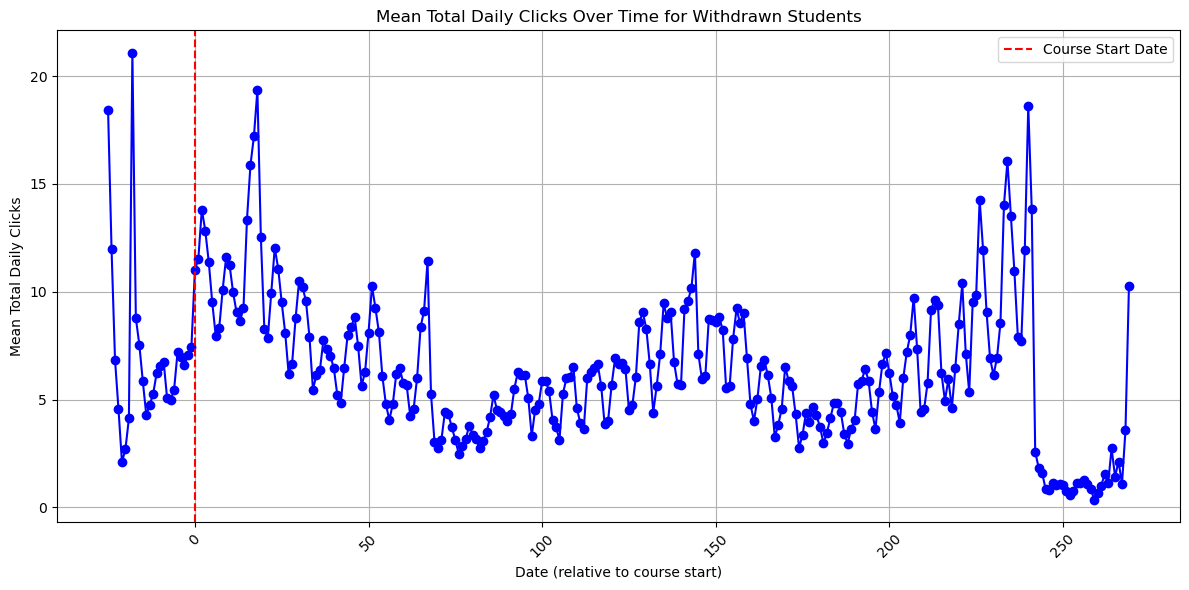

In [7]:
#plot the aggegrated data for withdrawn students
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(aggregated_df_withdrawn['date'], aggregated_df_withdrawn['total_daily_clicks'], marker='o', linestyle='-', color='blue')

# Adding plot title and labels
plt.title('Mean Total Daily Clicks Over Time for Withdrawn Students')
plt.xlabel('Date (relative to course start)')
plt.ylabel('Mean Total Daily Clicks')

# Adding a vertical line to indicate the course start date (if date=0 is the start)
plt.axvline(x=0, color='red', linestyle='--', label='Course Start Date')
plt.legend()

plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
#get aggregated df for all fail students

# Unique list of student IDs
unique_student_ids = df_fail['id_student'].unique()
# Initialize an empty DataFrame for combining data
combined_df = pd.DataFrame()

# Loop through each student ID
for student_id in unique_student_ids:
    # Check if the DataFrame is empty
    df=df_grouped
    if df[df['id_student']==student_id].empty:
        print(f"Skipping student ID {student_id} due to no data.")
        continue  # Skip the rest of the loop for this student ID
    # Assuming complete_df returns a DataFrame for the given student ID
    df_student = complete_df(student_id)
    
    # Combine the current student's data with the aggregated DataFrame
    combined_df = pd.concat([combined_df, df_student], ignore_index=True)

# Group by 'date' and calculate mean 'total_daily_clicks'
aggregated_df_fail = combined_df.groupby('date')['total_daily_clicks'].mean().reset_index()

Skipping student ID 79378 due to no data.
Skipping student ID 122524 due to no data.
Skipping student ID 133531 due to no data.
Skipping student ID 171377 due to no data.
Skipping student ID 205231 due to no data.
Skipping student ID 322745 due to no data.
Skipping student ID 323914 due to no data.
Skipping student ID 357038 due to no data.
Skipping student ID 366821 due to no data.
Skipping student ID 381640 due to no data.
Skipping student ID 386957 due to no data.
Skipping student ID 434094 due to no data.
Skipping student ID 443452 due to no data.
Skipping student ID 446145 due to no data.
Skipping student ID 494304 due to no data.
Skipping student ID 505694 due to no data.
Skipping student ID 512468 due to no data.
Skipping student ID 513005 due to no data.
Skipping student ID 517853 due to no data.
Skipping student ID 525797 due to no data.
Skipping student ID 532317 due to no data.
Skipping student ID 536216 due to no data.
Skipping student ID 536551 due to no data.
Skipping stu

Skipping student ID 682242 due to no data.
Skipping student ID 238249 due to no data.
Skipping student ID 357493 due to no data.
Skipping student ID 413190 due to no data.
Skipping student ID 484361 due to no data.
Skipping student ID 574399 due to no data.
Skipping student ID 579604 due to no data.
Skipping student ID 585758 due to no data.
Skipping student ID 586314 due to no data.
Skipping student ID 587226 due to no data.
Skipping student ID 594458 due to no data.
Skipping student ID 600077 due to no data.
Skipping student ID 2518880 due to no data.
Skipping student ID 121574 due to no data.
Skipping student ID 272103 due to no data.
Skipping student ID 488828 due to no data.
Skipping student ID 547100 due to no data.
Skipping student ID 28770 due to no data.
Skipping student ID 472845 due to no data.
Skipping student ID 612157 due to no data.
Skipping student ID 635552 due to no data.
Skipping student ID 653090 due to no data.
Skipping student ID 683170 due to no data.
Skipping st

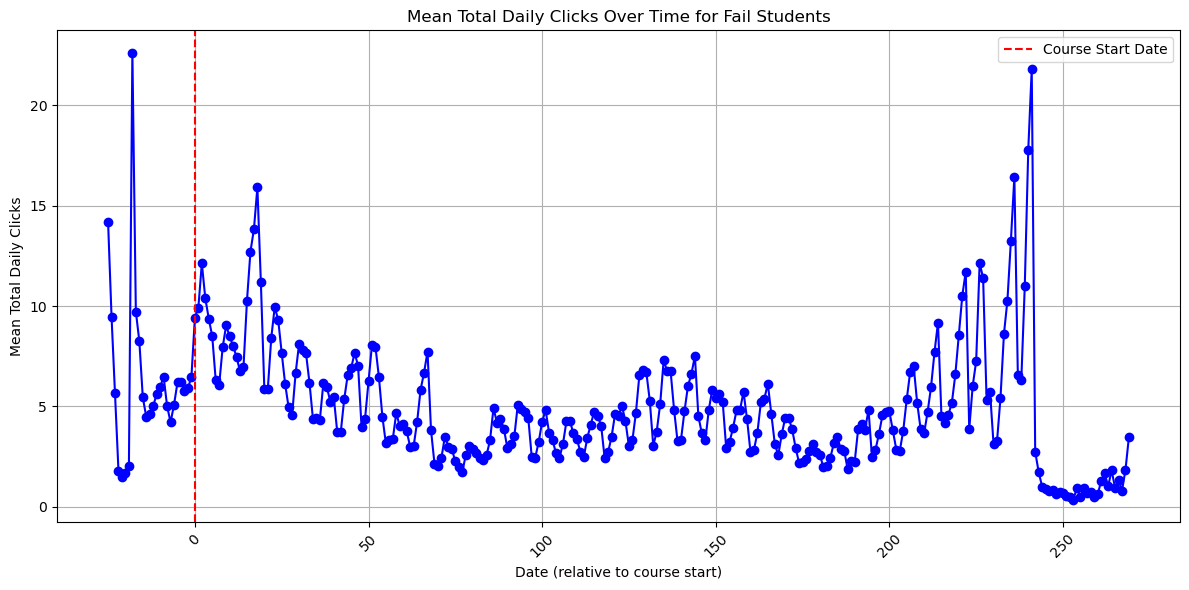

In [9]:
#plot the aggegrated data for fail students
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(aggregated_df_fail['date'], aggregated_df_fail['total_daily_clicks'], marker='o', linestyle='-', color='blue')

# Adding plot title and labels
plt.title('Mean Total Daily Clicks Over Time for Fail Students')
plt.xlabel('Date (relative to course start)')
plt.ylabel('Mean Total Daily Clicks')

# Adding a vertical line to indicate the course start date (if date=0 is the start)
plt.axvline(x=0, color='red', linestyle='--', label='Course Start Date')
plt.legend()

plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
#get aggregated df for all pass students

# Unique list of student IDs
unique_student_ids = df_pass['id_student'].unique()
# Initialize an empty DataFrame for combining data
combined_df = pd.DataFrame()

# Loop through each student ID
for student_id in unique_student_ids:
    # Check if the DataFrame is empty
    df=df_grouped
    if df[df['id_student']==student_id].empty:
        print(f"Skipping student ID {student_id} due to no data.")
        continue  # Skip the rest of the loop for this student ID
    # Assuming complete_df returns a DataFrame for the given student ID
    df_student = complete_df(student_id)
    
    # Combine the current student's data with the aggregated DataFrame
    combined_df = pd.concat([combined_df, df_student], ignore_index=True)

# Group by 'date' and calculate mean 'total_daily_clicks'
aggregated_df_pass = combined_df.groupby('date')['total_daily_clicks'].mean().reset_index()

Skipping student ID 327940 due to no data.
Skipping student ID 674777 due to no data.
Skipping student ID 1777834 due to no data.


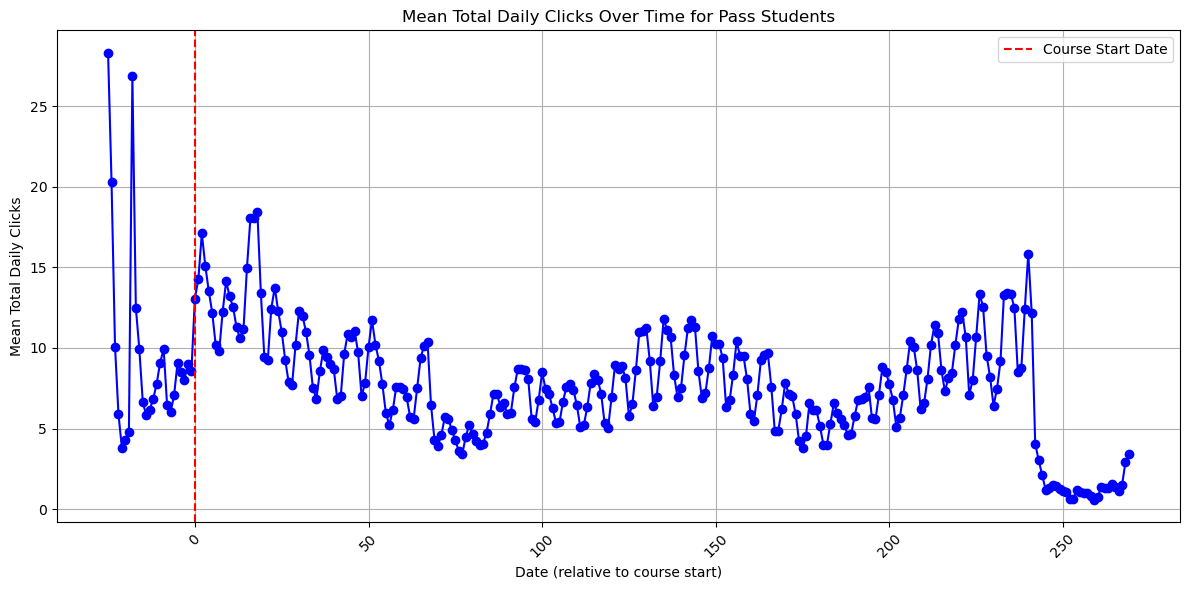

In [11]:
#plot the aggegrated data for pass students
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(aggregated_df_pass['date'], aggregated_df_pass['total_daily_clicks'], marker='o', linestyle='-', color='blue')

# Adding plot title and labels
plt.title('Mean Total Daily Clicks Over Time for Pass Students')
plt.xlabel('Date (relative to course start)')
plt.ylabel('Mean Total Daily Clicks')

# Adding a vertical line to indicate the course start date (if date=0 is the start)
plt.axvline(x=0, color='red', linestyle='--', label='Course Start Date')
plt.legend()

plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
#get aggregated df for all distinction students

# Unique list of student IDs
unique_student_ids = df_distinction['id_student'].unique()
# Initialize an empty DataFrame for combining data
combined_df = pd.DataFrame()

# Loop through each student ID
for student_id in unique_student_ids:
    # Check if the DataFrame is empty
    df=df_grouped
    if df[df['id_student']==student_id].empty:
        print(f"Skipping student ID {student_id} due to no data.")
        continue  # Skip the rest of the loop for this student ID
    # Assuming complete_df returns a DataFrame for the given student ID
    df_student = complete_df(student_id)
    
    # Combine the current student's data with the aggregated DataFrame
    combined_df = pd.concat([combined_df, df_student], ignore_index=True)

# Group by 'date' and calculate mean 'total_daily_clicks'
aggregated_df_distinction = combined_df.groupby('date')['total_daily_clicks'].mean().reset_index()

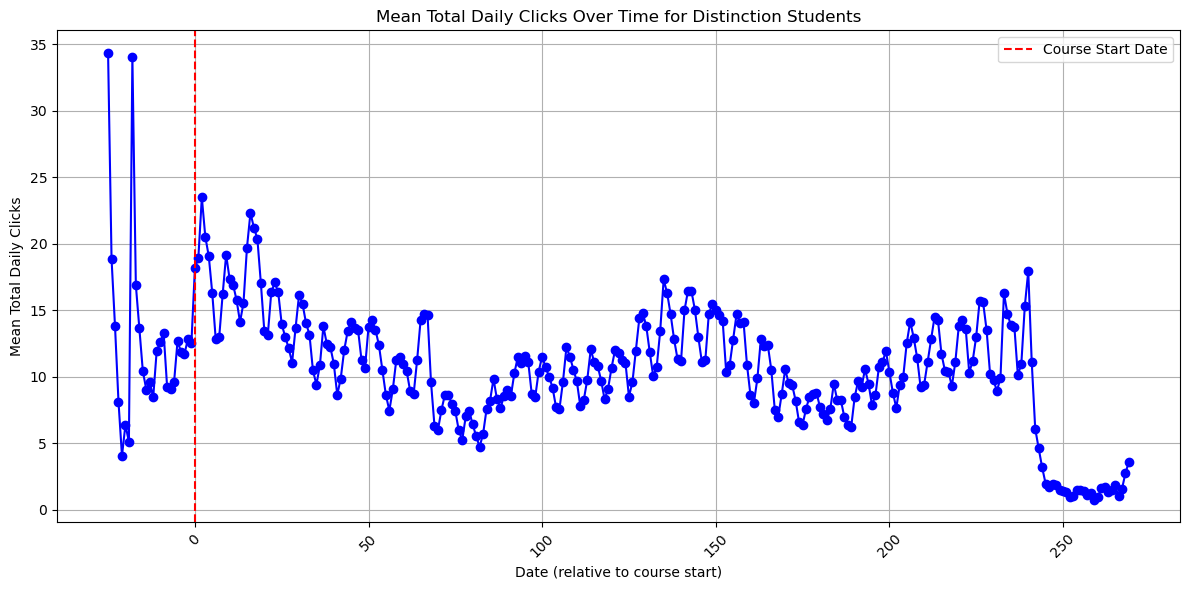

In [13]:
#plot the aggegrated data for distinction students
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(aggregated_df_distinction['date'], aggregated_df_distinction['total_daily_clicks'], marker='o', linestyle='-', color='blue')

# Adding plot title and labels
plt.title('Mean Total Daily Clicks Over Time for Distinction Students')
plt.xlabel('Date (relative to course start)')
plt.ylabel('Mean Total Daily Clicks')

# Adding a vertical line to indicate the course start date (if date=0 is the start)
plt.axvline(x=0, color='red', linestyle='--', label='Course Start Date')
plt.legend()

plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
#get 7-day moving averages for each dataset

aggregated_df_withdrawn['7_day_moving_avg'] = aggregated_df_withdrawn['total_daily_clicks'].rolling(window=7).mean()
aggregated_df_fail['7_day_moving_avg'] = aggregated_df_fail['total_daily_clicks'].rolling(window=7).mean()
aggregated_df_pass['7_day_moving_avg'] = aggregated_df_pass['total_daily_clicks'].rolling(window=7).mean()
aggregated_df_distinction['7_day_moving_avg'] = aggregated_df_distinction['total_daily_clicks'].rolling(window=7).mean()


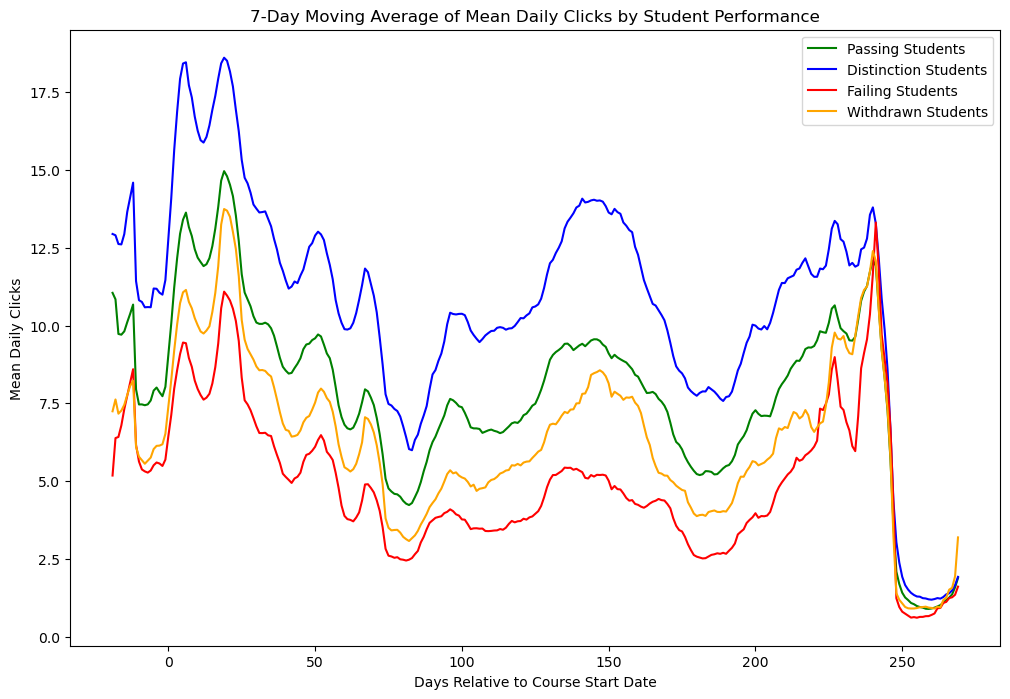

In [15]:
#plot 7-day moving averages

plt.figure(figsize=(12, 8))  # Set the figure size for better readability

# Plot each category with a specific color
plt.plot(aggregated_df_pass['date'], aggregated_df_pass['7_day_moving_avg'], color='green', label='Passing Students')
plt.plot(aggregated_df_distinction['date'], aggregated_df_distinction['7_day_moving_avg'], color='blue', label='Distinction Students')
plt.plot(aggregated_df_fail['date'], aggregated_df_fail['7_day_moving_avg'], color='red', label='Failing Students')
plt.plot(aggregated_df_withdrawn['date'], aggregated_df_withdrawn['7_day_moving_avg'], color='orange', label='Withdrawn Students')

# Adding titles and labels
plt.title('7-Day Moving Average of Mean Daily Clicks by Student Performance')
plt.xlabel('Days Relative to Course Start Date')
plt.ylabel('Mean Daily Clicks')

# Adding a legend
plt.legend()

# Display the plot
plt.show()
